# Aufgabe 5: Separierbarkeit der Gauß-Filterung
Als effizientere Variante kann eine zweidimensionale lineare Filterung auf zwei eindimensionale lineare Filterungen reduziert werden.

Ein linearer zweidimensionaler Filter $\boldsymbol{A} \in \mathbb{R}^{m \times n}$ heißt separierbar, wenn er durch Faltung zweier eindimensionaler Filter dargestellt werden kann:
\begin{align}
 \boldsymbol{A} &= \boldsymbol{D}_1 * \boldsymbol{D}_2, \qquad \text{mit $\boldsymbol{D}_1 \in \mathbb{R}^m, \boldsymbol{D}_2 \in \mathbb{R}^n$}\\
                &= \boldsymbol{D}_1 \cdot \boldsymbol{D}_2^\top,  \qquad \text{(da $\boldsymbol{D}_1,\boldsymbol{D}_2$ Vektoren).}
\end{align}
Somit ergibt sich die Faltung zu
\begin{align}
  \boldsymbol{I} * \boldsymbol{A} &= \boldsymbol{I} * (\boldsymbol{D_1} * \boldsymbol{D_2})\\
                                  &= (\boldsymbol{I} * \boldsymbol{D_1}) * \boldsymbol{D_2} \qquad \text{(Assoziativität der Faltung)}
\end{align}


Implementieren Sie nun die 2-D-Gaußfilterung als Hintereinanderausführung je eines Gaußfilters in vertikaler und horizontaler Richtung!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio
import numpy as np

In [2]:
# image_filter = 'Bilder/*.jpg'
image_filter = 'Bilder/Aerial.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier wie in der vorherigen Aufgabe zunächst die Parameter `m` und `sigma` des Filters. Berechnen Sie anschließend eine eindimensionale Filtermaske `A_gauss`!

In [3]:
m = 7
sigma = int(m / 5)
fil_rows = fil_cols = 2*sigma+1
A_gauss = np.zeros((fil_rows,1))

for i in range(-sigma,sigma+1):
        A_gauss[i+sigma]= np.exp(-0.5 * (i ** 2 ) / (sigma ** 2))
A_gauss

array([[0.60653066],
       [1.        ],
       [0.60653066]])

## 2. Laden des Bildes

In [4]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [5]:
image = np.asarray(image, dtype=np.float32) / 255

## 3. Berechung der Faltung
Setzen Sie hier die Funktion `ex2_convolve` aus der vorherigen Aufgabe ein:

In [6]:
def element_sum(image,filter_mask):
    res=(image*filter_mask).sum()
    if(res<0):
        res=0
    elif res>255:
        res =255
    return res

def ex2_convolve(image, filter_mask):
    convolved_image = np.zeros_like(image)
    comp_img=np.zeros_like(filter_mask)
    
    conv_rows,conv_cols = image.shape
    fil_rows,fil_cols = filter_mask.shape
    
    fil_half_rows=filter_mask.shape[0]//2
    fil_half_col=filter_mask.shape[1]//2
    img=np.pad(image,((fil_half_rows,fil_half_rows),(fil_half_col,fil_half_col)),'constant',constant_values = (0,0))
    
    for i in range(conv_rows):                     
        for j in range(conv_cols):
            convolved_image[i][j] = element_sum(img[i:i+fil_rows, j:j+fil_cols],filter_mask)

    return convolved_image

## 4. Separierter Gauß-Filter

Berechnen Sie nun das gefaltete Bild durch zwei Aufrufe der obigen Funktion! Tipp: Verwenden Sie die Funktion `transpose` aus dem Paket `numpy`, um die Filtermaske zu transponieren.

In [7]:
convolved_image = ex2_convolve(image, A_gauss)
A_gauss2 = np.transpose(A_gauss)
convolved_image = ex2_convolve(convolved_image, A_gauss2)

## 5. Darstellung
Um die Wirksamkeit des separierten Gauß-Filters zu überprüfen, stellen Sie `image` und `convolved_image` nebeneinander dar:

<IPython.core.display.Javascript object>


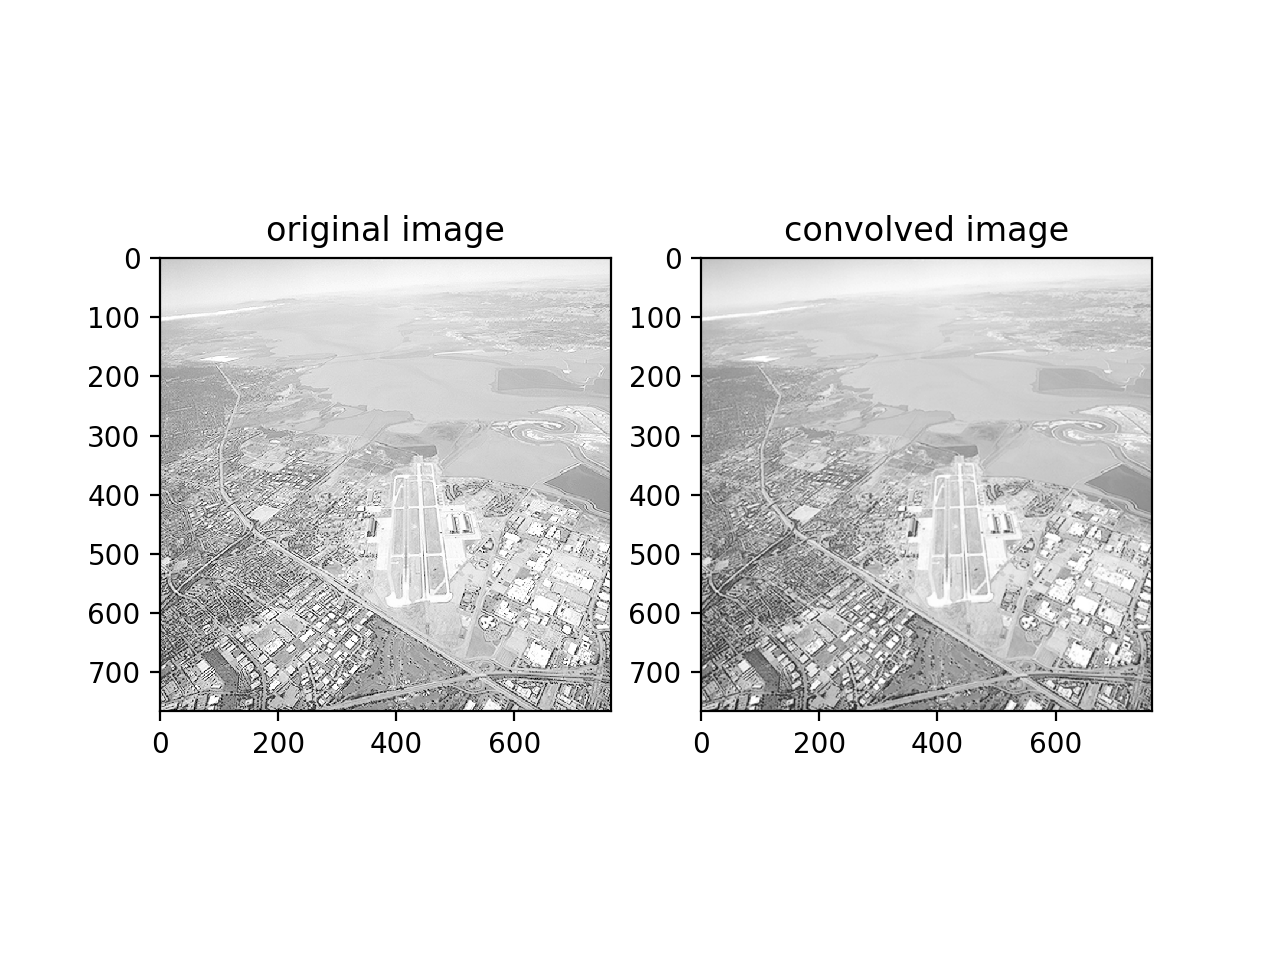

In [8]:
plt.figure('Image')

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title('convolved image')
plt.imshow(convolved_image, cmap='gray')
plt.show()